# Load different Tables from WRDS

Large tables like the 50+ GB Holdings table were downloaded from WRDS using an FTP client

## Holdings company information

In [2]:
import wrds
import feather
import matplotlib.pyplot as plt

# Connect to DB
db = wrds.Connection(wrds_username='amglex')
print('Successfully connected')

Loading library list...
Done
Successfully connected


## I. Download holdings data 
(only for tests / checks)

In [ ]:
######################
# Query the data
######################

print('Start downloading data ...')

# SQL Query
data_raw_df = db.raw_sql(
    '''
    SELECT distinct crsp_company_key, security_name, cusip, permno, permco
    FROM holdings;
    '''
)

print('SQL successful')

print(data_raw_df.shape)

print(data_raw_df.dtypes)

print(data_raw_df.head())

path = '../data/raw/holdings_co_info.feather'

feather.write_dataframe(data_raw_df, path)

print("Successfully saved data")

## II. Download fund information data

In [11]:
# Connect to DB
db = wrds.Connection(wrds_username='amglex')
print('Successfully connected')


######################
# Query the data
######################


print('Start downloading data ...')

# SQL Query: Summary table //// OLD WAY
# TODO Look ahead because of per_com?

data_raw_df = db.raw_sql(
    '''
    SELECT crsp_fundno, crsp_portno, fund_name, chgdt, enddt, index_fund_flag, et_flag
    FROM fund_hdr_hist;
    '''
)

print('SQL successful')

print(data_raw_df.shape)

path = '../../data/raw/fund_hdr.feather'
feather.write_dataframe(data_raw_df, path)

print("Successfully saved data")

Enter your WRDS username [alexandersteeb]:amglex
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
There was an error with your password.


OperationalError: (psycopg2.OperationalError) FATAL:  too many connections for role "amglex"

(Background on this error at: http://sqlalche.me/e/e3q8)

## III. Download fund summary data

In [3]:
######################
# Query the data
######################

print('Start downloading data ...')

# SQL Query
data_raw_df = db.raw_sql(
    '''
    SELECT crsp_fundno, caldt, summary_period, nav_latest, nav_latest_dt, tna_latest, tna_latest_dt, per_com
    FROM fund_summary
    WHERE caldt > '2002-01-01';
    '''
)

print('SQL successful')

print(data_raw_df.shape)

print(data_raw_df.dtypes)

print(data_raw_df.head())

feather.write_dataframe(data_raw_df, path)

print("Successfully saved data")

Start downloading data ...
SQL successful
(1866201, 8)
crsp_fundno       float64
caldt              object
summary_period     object
nav_latest        float64
nav_latest_dt      object
tna_latest        float64
tna_latest_dt      object
per_com           float64
dtype: object
   crsp_fundno       caldt summary_period  nav_latest nav_latest_dt  \
0        105.0  2002-03-28              Q        9.67    2002-03-28   
1        105.0  2002-06-28              Q        8.22    2002-06-28   
2        105.0  2002-09-30              Q        6.62    2002-09-30   
3        105.0  2002-12-31              Q        7.16    2002-12-31   
4        105.0  2003-03-31              Q        6.81    2003-03-31   

   tna_latest tna_latest_dt  per_com  
0        51.4    2002-03-28      NaN  
1        42.7    2002-06-28      NaN  
2        33.6    2002-09-30      NaN  
3        35.5    2002-12-31      NaN  
4        32.8    2003-03-31      NaN  
Successfully saved data


## IV. Download fund style data

In [4]:
######################
# Query the data
######################

print('Start downloading data ...')

# SQL Query
data_raw_df = db.raw_sql(
    '''
    SELECT crsp_fundno, begdt, enddt, lipper_class, lipper_obj_cd
    FROM fund_style;
    '''
)

print('SQL successful')

print(data_raw_df.shape)
print(data_raw_df.dtypes)
print(data_raw_df.head())

path = '../data/raw/fund_style.feather'
feather.write_dataframe(data_raw_df, path)

print("Successfully saved data")

Start downloading data ...
SQL successful
(169681, 5)
crsp_fundno      float64
begdt             object
enddt             object
lipper_class      object
lipper_obj_cd     object
dtype: object
   crsp_fundno       begdt       enddt lipper_class lipper_obj_cd
0          1.0  1997-12-31  1998-12-30         None          None
1          1.0  1998-12-31  1999-12-30         None           BBB
2          1.0  1999-12-31  2000-07-31          BBB           BBB
3          2.0  1997-12-31  1998-12-30         None          None
4          2.0  1998-12-31  1999-12-30         None            GI
Successfully saved data


## Test holdings data

In [34]:
######################
# Query the data
######################

print('Start downloading data ...')

# SQL Query
data_raw_df = db.raw_sql(
    '''
    SELECT EXTRACT(YEAR FROM report_dt) as year, COUNT(DISTINCT crsp_portno) as count_portno
    FROM holdings
    GROUP BY year;
    '''
)

print('SQL successful')

print(data_raw_df.shape)

print(data_raw_df.dtypes)

print(data_raw_df.head())

Start downloading data ...
SQL successful
(19, 2)
year            float64
count_portno      int64
dtype: object
     year  count_portno
0  2001.0             1
1  2002.0          1188
2  2003.0          3753
3  2004.0          3508
4  2005.0          3659


<BarContainer object of 19 artists>

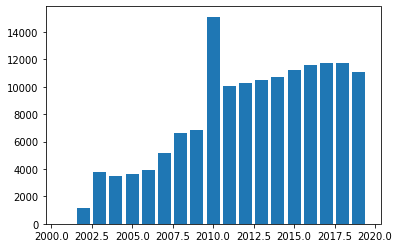

In [37]:
plt.bar(data_raw_df['year'],data_raw_df['count_portno'])

In [ ]:
# old sql

'''
    SELECT hdr.crsp_fundno, hdr.crsp_portno, hdr.fund_name,
        first_offer_dt, index_fund_flag, et_flag,
        begdt, enddt, lipper_class, avrcs
    FROM fund_hdr hdr
    FULL JOIN fund_style style
    ON hdr.crsp_fundno = style.crsp_fundno
    
    LEFT JOIN   
        (SELECT distinct 
            crsp_fundno, sum(per_com)/count(per_com) as avrcs
        FROM fund_summary 
        GROUP BY crsp_fundno) b
    ON style.crsp_fundno = b.crsp_fundno;
    '''

